In [1]:
!mkdir -p ~/.kaggle
from google.colab import drive
from google.colab import files
# Upload your kaggle.json API key
uploaded = files.upload()

drive.mount('/content/drive')

Saving kaggle.json to kaggle.json
Mounted at /content/drive


In [4]:
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Machine-learning'


In [5]:
import kaggle

# Set the dataset name and destination folder
dataset_name = "kmader/skin-cancer-mnist-ham10000"
destination_folder = "/content/drive/MyDrive/Machine-learning"

# Download the dataset
kaggle.api.dataset_download_files(dataset_name, path=destination_folder, unzip=True)


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
print("Import ok!")

Import ok!


In [7]:
data = pd.read_csv('/content/drive/MyDrive/Machine-learning/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [8]:
y = data['label']
x = data.drop(columns = ['label'])
len(x )

10015

In [9]:
tabular_data = pd.read_csv('/content/drive/MyDrive/Machine-learning/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [10]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
classes

{4: ('nv', ' melanocytic nevi'),
 6: ('mel', 'melanoma'),
 2: ('bkl', 'benign keratosis-like lesions'),
 1: ('bcc', ' basal cell carcinoma'),
 5: ('vasc', ' pyogenic granulomas and hemorrhage'),
 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
 3: ('df', 'dermatofibroma')}

#Oversampling

In [11]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [12]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


#Standardization and Splitting Data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_standardized = (x - np.mean(x)) / np.std(x)
# Reshape the standardized 'x' if it has more than two dimensions
num_samples = x_standardized.shape[0]
x_flattened = x_standardized.reshape(num_samples, -1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_flattened, y, test_size=0.2, random_state=1)

In [14]:
# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#SVM implementation


In [15]:
# Initialize SVM classifier
svm = SVC(kernel='linear', C=1.0)

# Train the model
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [16]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9555768616171301
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1359
           1       0.97      1.00      0.99      1318
           2       0.89      0.99      0.94      1262
           3       0.99      1.00      0.99      1351
           4       0.97      0.74      0.83      1374
           5       0.99      1.00      1.00      1358
           6       0.91      0.97      0.94      1365

    accuracy                           0.96      9387
   macro avg       0.96      0.96      0.95      9387
weighted avg       0.96      0.96      0.95      9387



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for the test set
y_pred = google_net_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes.values(), yticklabels=classes.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NameError: ignored

In [17]:
import matplotlib.pyplot as plt

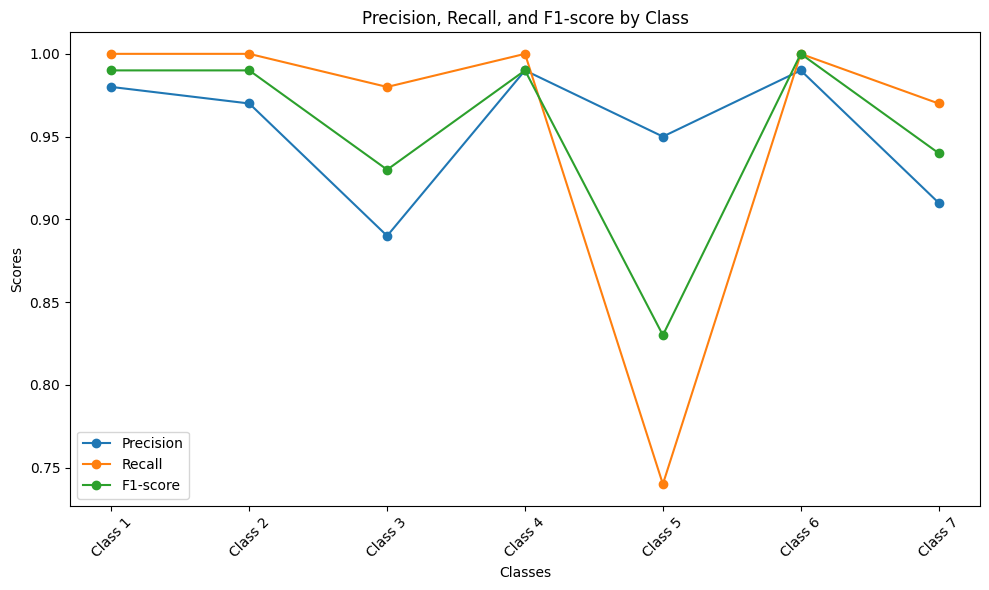

In [18]:
# Precision, Recall, and F1-score values for each class
precision_values = [0.98, 0.97, 0.89, 0.99, 0.95, 0.99, 0.91]
recall_values = [1.00, 1.00, 0.98, 1.00, 0.74, 1.00, 0.97]
f1_score_values = [0.99, 0.99, 0.93, 0.99, 0.83, 1.00, 0.94]

# Labels for each class
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']

# Line chart data
x = range(len(class_labels))

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot precision, recall, and F1-score as lines
plt.plot(x, precision_values, marker='o', label='Precision')
plt.plot(x, recall_values, marker='o', label='Recall')
plt.plot(x, f1_score_values, marker='o', label='F1-score')

# Set x-axis ticks and labels
plt.xticks(x, class_labels, rotation=45)

# Add labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score by Class')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
